# Training neural nets on random numbers

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import argparse
import matplotlib.pyplot as plt

In [2]:
def sigmoid_activation(x):
    return 1.0/(1.0+np.exp(-x))
(X,y)= make_blobs(n_samples=250,n_features=5,centers=2,cluster_std=1.05, random_state=20)
X=np.c_[np.ones((X.shape[0])),X]

Actvn: 0.0039; predictedLabel=1, true_label=0
Actvn: 0.9633; predictedLabel=0, true_label=1
Actvn: 0.9798; predictedLabel=0, true_label=1
Actvn: 0.0041; predictedLabel=1, true_label=0
Actvn: 0.9701; predictedLabel=0, true_label=1
Actvn: 0.0026; predictedLabel=1, true_label=0
Actvn: 0.9886; predictedLabel=0, true_label=1
Actvn: 0.0003; predictedLabel=1, true_label=0
Actvn: 0.0002; predictedLabel=1, true_label=0
Actvn: 0.0013; predictedLabel=1, true_label=0


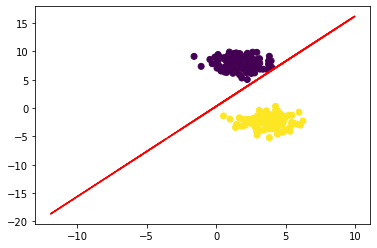

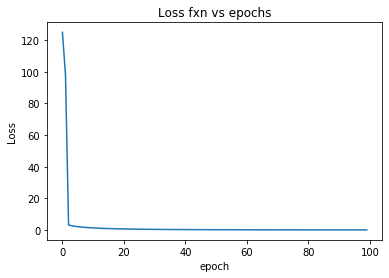

In [3]:
#ap = argparse.ArgumentParser()
#ap.add_argument("-e","--epochs",type=float,default=100,help="Num of epochs")
#ap.add_argument("-a","--alpha",type=float, default=0.01,help="Learning rate")
#args = vars(ap.parse_args())
epochs=100
learning_rate=np.exp(-3)
W=np.random.uniform(size=(X.shape[1],))
lossHistory=[]
for epoch in np.arange(0,epochs):
    preds = sigmoid_activation(X.dot(W))
    error = preds-y
    loss = np.sum(error **2)
    lossHistory.append(loss)
    
    #calculation of gradient descent
    #gradient = 2*error*X--Assuming no sigmoid activation
    gradient = X.T.dot(error)/X.shape[0]
    W += -learning_rate*gradient
    #End of gradient descent
    
for i in np.random.choice(250,10):
    activation= sigmoid_activation(X[i].dot(W))
    label = 0 if activation>=0.5 else 1
    
    print("Actvn: {:.4f}; predictedLabel={}, true_label={}".format(
    activation, label, y[i]))
Y=(-W[0] -(W[1]*X))/W[2]
plt.figure()
plt.scatter(X[:,1],X[:,2],marker="o",c=y)
plt.plot(X,Y,"r-")

fig=plt.figure()
plt.plot(np.arange(0,epochs),lossHistory)
plt.title("Loss fxn vs epochs")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.show()

In [4]:
print(X.shape,W.shape,X[0].shape)

(250, 6) (6,) (6,)


# Comparing Tensorflow and PyTorch on basic operations. *
 Performing basic function f = (x*y)+z 

### Tensorflow computation of (x*y)+z

In [5]:
import tensorflow as tf
import numpy as np
np.random.seed(0)

/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nancyscarlet/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/nancyscarlet/opt/anaconda3/lib/python3.7/s

In [6]:
N1,D1 = 3,4
#with tf.device('/gpu:0'):
x1= tf.placeholder(tf.float32)
y1=tf.placeholder(tf.float32)
z1=tf.placeholder(tf.float32)
    #This is not allocating memory instead it just serves as prototype
    #to possible inputs to the graph 
a = x1 * y1
b = a + z1
c = tf.reduce_sum(b)

In [7]:
#Calculation of gradients is easy with a single line
grad_x,grad_y,grad_z = tf.gradients(c,[x1,y1,z1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [8]:
#Intitialising a tensorflow session where it actually assigns
#values to tensors and executes the computational graph prototype
with tf.Session() as sess:
    values={
        x1: np.random.randn(N1,D1),
        y1: np.random.randn(N1,D1),
        z1: np.random.randn(N1,D1),
    }
    out = sess.run([c,grad_x,grad_y,grad_z],feed_dict=values)
    #Calculation of output by running session and passing values
    #via feed_dict parameter
    c_val, grad_x_val, grad_y_val, grad_z_val = out
    

### PyTorch computation of (x*y)+z

In [9]:
import torch
from torch.Autograd import Variable

ModuleNotFoundError: No module named 'torch'

In [ ]:
N,D=3,4
#By specifying cuda we are asking to initialize these variables on GPU
x = Variable(torch.randn(N,D).cuda(),requires_grad=True)
y = Variable(torch.randn(N,D).cuda(),requires_grad=True)
z = Variable(torch.randn(N,D).cuda(),requires_grad=True)

a=x*y
b=a+z
c = torch.sum(b)

#Calculating gradients of c wrt all variables which had
#required_grad=True by doing backpropagation
c.backward()

print(x.grad)
print(x.grad.data)
print(y.grad)
print(y.grad.data)
print(z.grad)
print(z.grad.data)

## Basic neural net with random numbers 

### Tensorflow simulation

In [ ]:
#Defining copmutational graph
N,D,H=100,5,10
x = tf.placeholder(tf.float32, shape=(N,D))
y = tf.placeholder(tf.float32, shape=(N,1))


#These wts variables needs to be persisted between graph calls
#Hence we need to add them as nodes so that their values are persisted
#and carried to the next graph flow
w1_random = tf.Variable(tf.random_normal((D,H)))
w2_random = tf.Variable(tf.random_normal((H,1)))



#Instead of defining weights, initialise weights with xavier initialiser
#which divides the weights by num of features incoming from input
init = tf.contrib.layers.xavier_initializer()


#Applying relu activation fxn over x.w1
h_relu= tf.maximum(0.0,tf.matmul(x,w1_random))
h = tf.layers.dense(inputs = x, units=H,
                    activation=tf.nn.relu,
                   kernel_initializer=init)


y_pred_manual = tf.matmul(h,w2_random)
y_pred = tf.layers.dense(inputs=h, units=1, kernel_initializer=init)


diff=y_pred-y
loss_customized = tf.reduce_mean(tf.reduce_sum(diff*diff,axis=1))
# Use predefined tensorflow's mean squared loss 
loss = tf.losses.mean_squared_error(y_pred,y)


#learning_rate=1e-5
grad_w1,grad_w2 = tf.gradients(loss,[w1_random,w2_random])

###After adding optimizer adding custom updation of weights is unnecessary
#Persisting weights via new nodes
#new_w1 = w1.assign(w1 - learning_rate*grad_w1)
#new_w2 = w2.assign(w2 - learning_rate*grad_w2)
#updates = tf.group(new_w1,new_w2)

#Adding optimizer
optimizer = tf.train.GradientDescentOptimizer(1e-1)
updates = optimizer.minimize(loss)

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())               
    values={
        x: np.random.randn(N,D),
        y: np.random.randn(N,1),
    }
    losses=[]
    epochs=30
    for t in range(epochs):
        loss_val,_ = sess.run([loss,updates], feed_dict=values)
        losses.append(loss_val)
        if(t%5==0):
            print('Loss in %d th epoch: %f \n' %(t,loss_val))
        ####Dont need this code as the values of wts are being updated in a node of computational graph
        #out = sess.run([loss,grad_w1,grad_w2],feed_dict=values)
        #loss_val, grad_w1_val, grad_w2_val = out
        #values[w1] -= learning_rate*grad_w1_val
        #values[w2] -= learning_rate*grad_w2_val

In [ ]:
plt.plot(losses)
plt.show()

### Keras 

Keras is high level wrapper over tensorflow.
Built in Python and more user readable.
its a neural net library.
Tensorflow is used for various other ml operations than constructing
nn. Keras uses tensorflow in the backend and is slower compared to tensorflow.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [ ]:
#Defining model
model = Sequential()

N,D,H=100,5,10

#Defining layers and their dimensions
model.add(Dense(input_dim=D,output_dim=H))

#Adding activation to the above created layer
model.add(Activation('relu'))

#Defining output layer
model.add(Dense(input_dim=H,output_dim=1))

#Defining an optimiser (here Stochastic Gradient descent with learning rate = 1)
optimizer = SGD(lr=1e0)

#Compile the model
model.compile(loss='mean_squared_error',optimizer=optimizer)

x = np.random.randn(N,D)
y = np.random.randn(N,1)

k = model.fit(x,y,nb_epoch=10,batch_size=N,verbose=0)

## Pretrained models - TRANSFER LEARNING

USING KERAS PRETRAINED IMAGE CLASSIFIER

In [ ]:
from keras.applications import ResNet50,imagenet_utils
from keras.preprocessing import image
#from imagenet_utils import preprocess_input, decode_predictions

model = ResNet50(weights='imagenet')
img_path='doggie.jpg'
img = image.load(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [ ]:
preds = model.predict(x)
print("Predicted: ", decode_predictions(preds))

## Tensorflow conditional operations

Normal if statements are not used in tensorflow instead 'tf.cond(condition)' is used. Comparison operations are performed like 'tf.less(z,0)'

In [ ]:
r = 10
if r>0:
    print("Greater")
else:
    print("Not greater")

In [ ]:
def f1():return "Greater"
def f2():return "Lesser"
#CHecking if second argument is what compared to first argument
j=tf.cond(tf.less(r,0),f1,f2)
print("J:",j)
with tf.Session() as sess:
    sess.run(j)
    print(j.eval())

## Dynamic loops in Tensorflow

In [ ]:
#Fxn y(t+1) = y(t)+x(t+1)
x = tf.placeholder(tf.float32, shape=(10,2))
y0 = tf.placeholder(tf.float32, shape=(2,))

def fxnn(prev_y,curr_x):
    return prev_y+curr_x

# In Tensorflow we use 'foldl(fxnName,inputslisttoFxn)' to pass onn
# a (time dependent)/dynamic variable.
# This function performs dynamic batching in tensorflow.
y = tf.foldl(fxnn,y0,x)
with tf.Session() as sess:
    values={
        x: np.random.randn(10,2),
        y0: np.random.randn(2,),
    }
    y_val = sess.run(y,feed_dict=values)
    print(y_val)

APPLICATIONS OF DYNAMIC GRAPH:
1. Dynamic Graphs are used in Recurrent neural networks.
2. recursive nn.
3. modular nn
 In an image of cats and dogs, we need to find if more cats are there or dogs.

In [ ]:
pwd

In [ ]:
ls

# Training on cifar data

In [ ]:
ls

In [4]:
# %load load_cifar_10.py
import numpy as np
import matplotlib.pyplot as plt
import pickle

"""
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 
training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains 
exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random 
order, but some training batches may contain more images from one class than another. Between them, the training 
batches contain exactly 5000 images from each class.
"""


def unpickle(file):
    """load the cifar-10 data"""

    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data


def load_cifar_10_data(data_dir, negatives=False):
    """
    Return train_data, train_filenames, train_labels, test_data, test_filenames, test_labels
    """

    # get the meta_data_dict
    # num_cases_per_batch: 1000
    # label_names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    # num_vis: :3072

    meta_data_dict = unpickle(data_dir + "/batches.meta")
    cifar_label_names = meta_data_dict[b'label_names']
    cifar_label_names = np.array(cifar_label_names)

    # training data
    cifar_train_data = None
    cifar_train_filenames = []
    cifar_train_labels = []

    # cifar_train_data_dict
    # 'batch_label': 'training batch 5 of 5'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    for i in range(1, 6):
        cifar_train_data_dict = unpickle(data_dir + "/data_batch_{}".format(i))
        if i == 1:
            cifar_train_data = cifar_train_data_dict[b'data']
        else:
            cifar_train_data = np.vstack((cifar_train_data, cifar_train_data_dict[b'data']))
        cifar_train_filenames += cifar_train_data_dict[b'filenames']
        cifar_train_labels += cifar_train_data_dict[b'labels']

    cifar_train_data = cifar_train_data.reshape((len(cifar_train_data), 3, 32, 32))
    if negatives:
        cifar_train_data = cifar_train_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_train_data = np.rollaxis(cifar_train_data, 1, 4)
    cifar_train_filenames = np.array(cifar_train_filenames)
    cifar_train_labels = np.array(cifar_train_labels)

    # test data
    # cifar_test_data_dict
    # 'batch_label': 'testing batch 1 of 1'
    # 'data': ndarray
    # 'filenames': list
    # 'labels': list

    cifar_test_data_dict = unpickle(data_dir + "/test_batch")
    cifar_test_data = cifar_test_data_dict[b'data']
    cifar_test_filenames = cifar_test_data_dict[b'filenames']
    cifar_test_labels = cifar_test_data_dict[b'labels']

    cifar_test_data = cifar_test_data.reshape((len(cifar_test_data), 3, 32, 32))
    if negatives:
        cifar_test_data = cifar_test_data.transpose(0, 2, 3, 1).astype(np.float32)
    else:
        cifar_test_data = np.rollaxis(cifar_test_data, 1, 4)
    cifar_test_filenames = np.array(cifar_test_filenames)
    cifar_test_labels = np.array(cifar_test_labels)

    return cifar_train_data, cifar_train_filenames, cifar_train_labels, \
        cifar_test_data, cifar_test_filenames, cifar_test_labels, cifar_label_names


if __name__ == "__main__":
    """show it works"""

    cifar_10_dir = 'cifar-10-batches-py'

    train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
        load_cifar_10_data(cifar_10_dir)

    print("Train data: ", train_data.shape)
    print("Train filenames: ", train_filenames.shape)
    print("Train labels: ", train_labels.shape)
    print("Test data: ", test_data.shape)
    print("Test filenames: ", test_filenames.shape)
    print("Test labels: ", test_labels.shape)
    print("Label names: ", label_names.shape)

    # Don't forget that the label_names and filesnames are in binary and need conversion if used.

    # display some random training images in a 25x25 grid
    num_plot = 5
    f, ax = plt.subplots(num_plot, num_plot)
    for m in range(num_plot):
        for n in range(num_plot):
            idx = np.random.randint(0, train_data.shape[0])
            ax[m, n].imshow(train_data[idx])
            ax[m, n].get_xaxis().set_visible(False)
            ax[m, n].get_yaxis().set_visible(False)
    f.subplots_adjust(hspace=0.1)
    f.subplots_adjust(wspace=0)
    plt.show()


Train data:  (50000, 32, 32, 3)
Train filenames:  (50000,)
Train labels:  (50000,)
Test data:  (10000, 32, 32, 3)
Test filenames:  (10000,)
Test labels:  (10000,)
Label names:  (10,)


<Figure size 640x480 with 25 Axes>

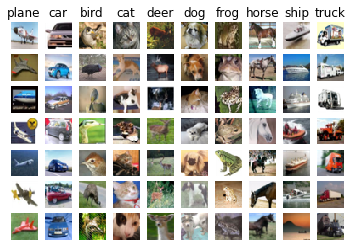

In [5]:
y_train=train_labels
y_test=test_labels
X_train=train_data
X_test = test_data
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [6]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]
X_train.shape

(5000, 32, 32, 3)

In [7]:
# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

from classifiers import knn
from classifiers.knn import knearestneighbor
classifier = knearestneighbor()
#knn.init(X_train,y_train,X_test,2)
k=1
classifier.train(X_train,y_train,X_test,k)
#Predicting labels
y_pred = classifier.predict_labels(dists)


In [40]:
y_pred = classifier.predict(X_test)
n_crt= np.sum(y_pred==y_test)
accuracy = n_crt/X_test.shape[0]
print("Accuracy: ",accuracy)
print('Num crt predictions: ',n_crt)

Accuracy:  0.272
Num crt predictions:  136


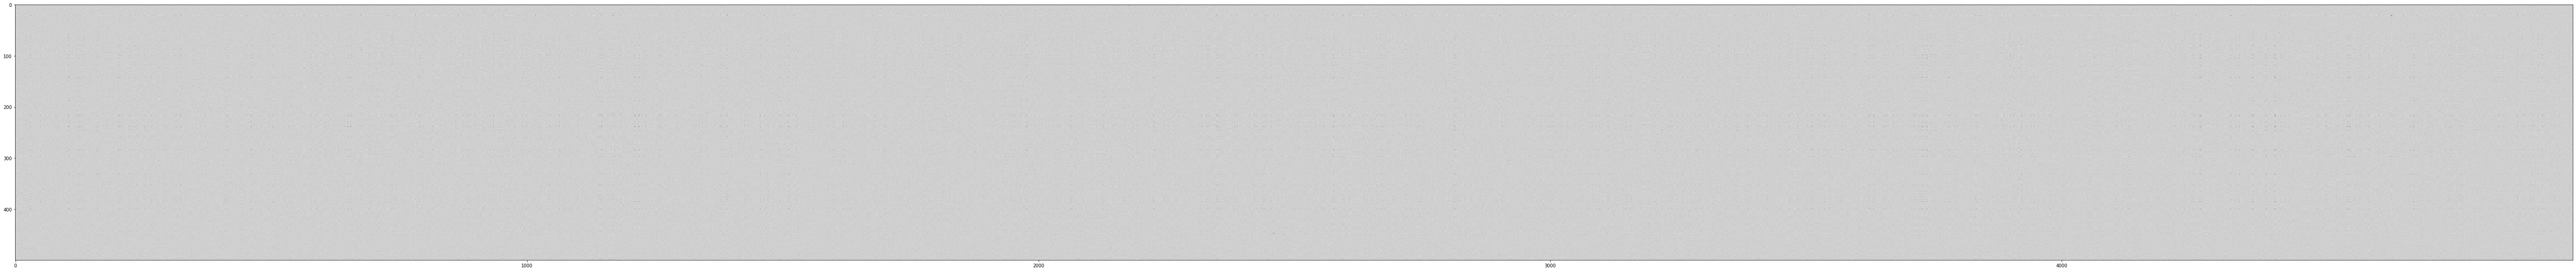

In [39]:
#Visualising distance matrix
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (100.0, 80.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

plt.imshow(dists,interpolation='none')
plt.show()